In [97]:
import os
import requests
import pandas as pd
import json

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('C://Users//ratan//automated_data_pipeline//scripts//output//stock_data.csv')
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

display(pdf)

print(pdf.columns)



,Open,High,Low,Close,Volume,Daily Range
Date,,,,,,
2024-07-02,174.84,177.4850,174.3200,177.30,2883275,3.1650
2024-07-03,177.88,177.9800,175.1700,175.73,1649049,2.8100
2024-07-05,175.74,176.0900,173.9500,176.02,2085970,2.1400
2024-07-08,176.41,178.5900,176.0100,177.64,2503038,2.5800
2024-07-09,177.60,177.7000,175.5800,176.48,2513305,2.1200
...,...,...,...,...,...,...
2024-11-12,211.90,213.0300,209.0600,210.86,2818216,3.9700
2024-11-13,209.50,211.4100,209.0701,210.92,3247830,2.3399
2024-11-14,210.00,210.4999,206.3500,208.99,6372853,4.1499


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Range'], dtype='object')


In [110]:
print(pdf.index)


DatetimeIndex(['2024-07-02', '2024-07-03', '2024-07-05', '2024-07-08',
               '2024-07-09', '2024-07-10', '2024-07-11', '2024-07-12',
               '2024-07-15', '2024-07-16', '2024-07-17', '2024-07-18',
               '2024-07-19', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26', '2024-07-29', '2024-07-30',
               '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-05',
               '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09',
               '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15',
               '2024-08-16', '2024-08-19', '2024-08-20', '2024-08-21',
               '2024-08-22', '2024-08-23', '2024-08-26', '2024-08-27',
               '2024-08-28', '2024-08-29', '2024-08-30', '2024-09-03',
               '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-09',
               '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13',
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
      

In [114]:
# Forward-fill to handle missing values
data = data.asfreq('D').fillna(method='ffill')

# Ensure model sees the true value on 2024-11-21
data.loc['2024-11-21', 'Close'] = 222.80

# Use the most recent 3 months of data
train = data.loc['2024-08-01':]


In [115]:
model = ARIMA(train['Close'], order=(5, 1, 0))  # Test orders (5, 1, 0), (1, 1, 1), etc.
model_fit = model.fit()

# Forecast the next 5 days
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Align forecast with observed dates
forecast.index = pd.date_range(
    start=data.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)

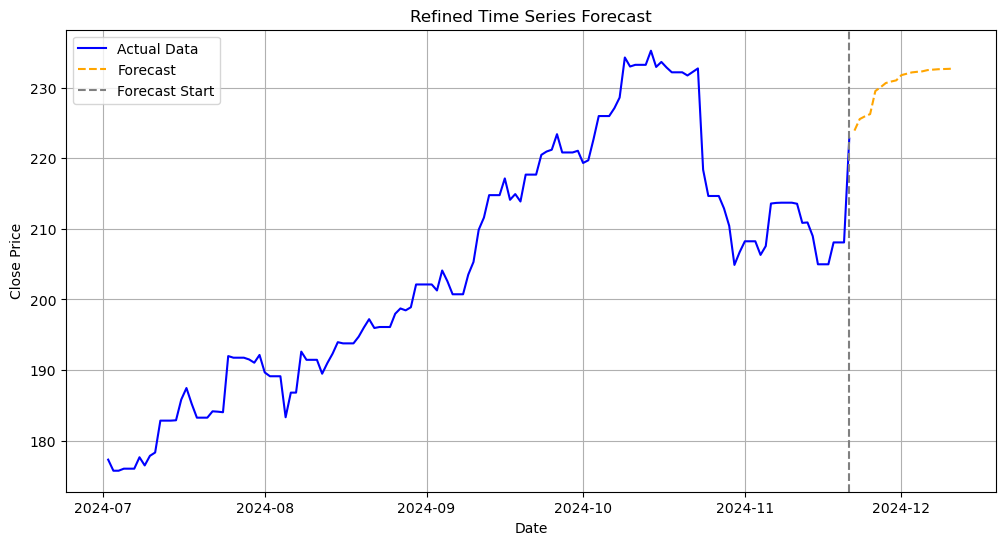

Forecasted Values:
2024-11-22    223.938112
2024-11-23    225.569063
2024-11-24    225.958986
2024-11-25    226.281498
2024-11-26    229.547918
2024-11-27    230.082984
2024-11-28    230.679395
2024-11-29    230.888628
2024-11-30    231.056978
2024-12-01    231.803491
2024-12-02    231.995286
2024-12-03    232.187951
2024-12-04    232.271273
2024-12-05    232.337181
2024-12-06    232.513576
2024-12-07    232.575690
2024-12-08    232.634438
2024-12-09    232.663767
2024-12-10    232.686730
2024-12-11    232.729923
Freq: D, Name: predicted_mean, dtype: float64


In [116]:
# Plot the actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='orange', linestyle='--')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Forecast Start')

# Add labels and legend
plt.title("Refined Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()

# Show plot
plt.show()

print("Forecasted Values:")
print(forecast)
